<a href="https://colab.research.google.com/gist/DolgorTs/60b51f017cf9769eb9aed58964852abe/-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:

1 Загрузите файл HR.csv в pandas dataframe

2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных. Определите две самые скоррелированные и две наименее
скоррелированные переменные.

4 Рассчитайте сколько сотрудников работает в каждом
департаменте.

5 Показать распределение сотрудников по зарплатам.

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

*  Доля сотрудников с повышением за последние 5 лет
*  Средняя степень удовлетворенности
*  Среднее количество проектов

9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA (Линейный дискриминантный анализ), предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary). Оценить качество модели на тестовой выборки

10 Загрузить jupyter notebook с решение на github и прислать ссылку

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import shapiro

In [ ]:
# 1. Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


1. **satisfaction_level** - Уровень удовлетворенности работой - **КОЛИЧЕСТВЕННЫЙ**
2. **last_evaluation** - Время с момента последней оценки в годах - **КОЛИЧЕСТВЕННЫЙ**
3. **number_project** - Количество проектов, выполненных за время работы - **КОЛИЧЕСТВЕННЫЙ**
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц - **КОЛИЧЕСТВЕННЫЙ**
5. **time_spend_company** - Стаж работы в компании в годах - **КОЛИЧЕСТВЕННЫЙ**
6. **Work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником - **КАТЕГОРИАЛЬНЫЙ**
7. **left** - уволился ли сотрудник - **КАТЕГОРИАЛЬНЫЙ**
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет - **КАТЕГОРИАЛЬНЫЙ**
9. **department** - отдел в котором работает сотрудник - **КАТЕГОРИАЛЬНЫЙ**
10. **salary** - относительный уровень зарплаты - **КАТЕГОРИАЛЬНЫЙ**

In [ ]:
# 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [ ]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [ ]:
print('median:')
print(df['satisfaction_level'].median())
print('-----------')
print('mode:')
print(df['satisfaction_level'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['satisfaction_level'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['satisfaction_level'].var())

median:
0.64
-----------
mode:
0.1
-----------
std - стандарт. отклонение
0.24863065106114257
-----------
var - дисперсия:
0.06181720064708763


In [ ]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

In [ ]:
print('median:')
print(df['last_evaluation'].median())
print('-----------')
print('mode:')
print(df['last_evaluation'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['last_evaluation'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['last_evaluation'].var())

median:
0.72
-----------
mode:
0.55
-----------
std - стандарт. отклонение
0.17116911062327533
-----------
var - дисперсия:
0.02929886443156307


In [ ]:
df['number_project'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [ ]:
print('median:')
print(df['number_project'].median())
print('-----------')
print('mode:')
print(df['number_project'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['number_project'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['number_project'].var())

median:
4.0
-----------
mode:
4
-----------
std - стандарт. отклонение
1.2325923553183522
-----------
var - дисперсия:
1.519283914389243


In [ ]:
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [ ]:
print('median:')
print(df['average_montly_hours'].median())
print('-----------')
print('mode:')
print(df['average_montly_hours'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['average_montly_hours'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['average_montly_hours'].var())

median:
200.0
-----------
mode:
135
-----------
std - стандарт. отклонение
49.94309937128408
-----------
var - дисперсия:
2494.313174809956


In [ ]:
df['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [ ]:
print('median:')
print(df['time_spend_company'].median())
print('-----------')
print('mode:')
print(df['time_spend_company'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['time_spend_company'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['time_spend_company'].var())

median:
3.0
-----------
mode:
3
-----------
std - стандарт. отклонение
1.4601362305354812
-----------
var - дисперсия:
2.131997811722364


In [ ]:
print('Work_accident mode:')
print(df['Work_accident'].mode()[0])

Work_accident mode:
0


In [ ]:
print('left mode:')
print(df['left'].mode()[0])

left mode:
0


In [ ]:
print('promotion_last_5years mode:')
print(df['promotion_last_5years'].mode()[0])

promotion_last_5years mode:
0


In [ ]:
print('department mode:')
print(df['department'].mode()[0])

department mode:
sales


In [ ]:
print('salary mode:')
print(df['salary'].mode()[0])

salary mode:
low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

corr_matrix_pearson = df[['satisfaction_level', "last_evaluation", "number_project", 'average_montly_hours', 'time_spend_company']].corr()
corr_matrix_pearson

satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000

In [ ]:
corrr = df[['satisfaction_level', "last_evaluation"]].corr(method = 'pearson')
corrr['satisfaction_level'][1]

0.10502121397148648

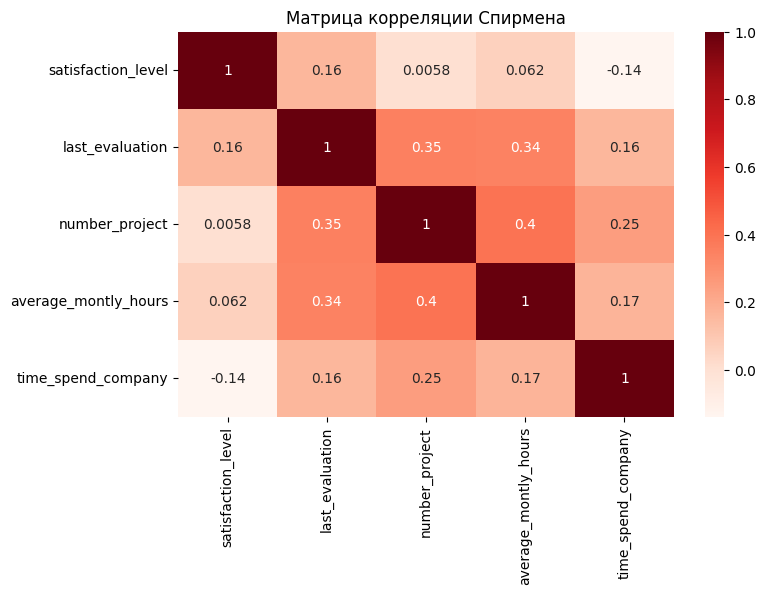

In [ ]:
corr_matrix_spearman = df[['satisfaction_level', "last_evaluation", "number_project", 'average_montly_hours', 'time_spend_company']].corr('spearman')
plt.figure(figsize=[8, 5])
sns.heatmap(corr_matrix_spearman, annot=True, cmap='Reds')
plt.title("Матрица корреляции Спирмена")
plt.show()

Два наиболее скоррелированных показателя: number_project и average_montly_hours. Есть взаимосвязь, что чем больше сотрудник выполняет проектов, тем больше он в среднем проводит времени на работе.

Два наименее скоррелированных показателя: number_project и satisfaction_level. Взаимосвязи между этими переменными практически нет, либо она не отлавливается корреляцией.

In [ ]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

count_workers = df.loc[df['left'] == 0]

In [ ]:
dep_count = count_workers['department'].value_counts()
dep_count

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

In [ ]:
# 5. Показать распределение сотрудников по зарплатам

fig = px.histogram(
    data_frame=count_workers,
    x='salary',
    title='Распределение сотрудников по зарплатам',
    marginal='box',
    histnorm='percent'
)
fig.show()

In [ ]:
# df.drop('new_sal', axis = 1, inplace = True)

In [ ]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

def f(row):
    if row['salary'] == 'low':
        val = '1'
    elif row['salary'] == 'medium':
        val = '1'
    else:
        val = '1'
    return val

df['new_sal'] = df.apply(f, axis = 1)

In [ ]:
dep_sal = pd.pivot_table(data=df, index='department', columns='salary', values='new_sal', aggfunc='count')
dep_sal

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147

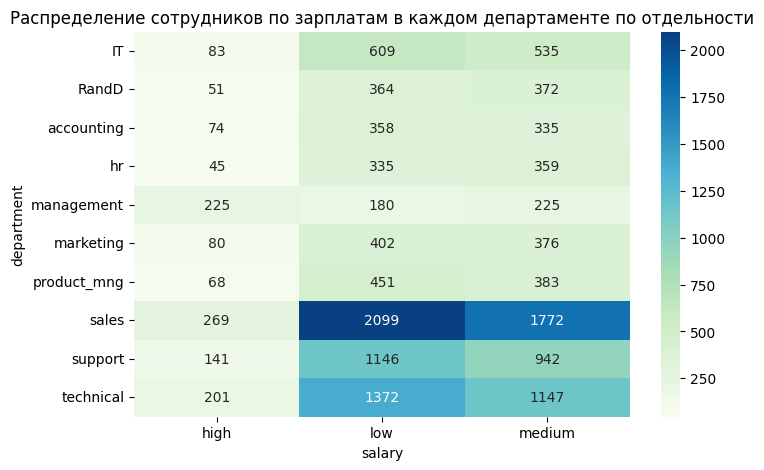

In [ ]:
plt.figure(figsize=[8, 5])
sns.heatmap(dep_sal, annot=True, cmap= 'GnBu', fmt='.0f')
plt.title("Распределение сотрудников по зарплатам в каждом департаменте по отдельности")
plt.show()

In [ ]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

df.groupby('salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

In [ ]:
fig = px.box(
    data_frame=df,
    x='salary',
    y='average_montly_hours',
    color='salary',
    title='Распределение зарплаты по среднему времени проведенному на работе',
)
fig.show()

Две выборки:
1. Сотрудники с низким окладом (low)  и их среднее время на работе
2. Сотрудники с высоким окладом (high) и их среднее время на работе

Сравнить по Критерию стьюдента среднее время на работе

- H0 - среднее время равно
- H1 - среднее время неравно

Уровень значимости - 0.001 (т.к. данных в выборке больше 1000)


In [ ]:
df_high = df[df["salary"].isin(['high'])]

In [ ]:
# Выборка сотрудников с высоким окладом и их среднее время на работе

high_salary = df_high['average_montly_hours'].tolist()


In [ ]:
df_low = df[df["salary"].isin(['low'])]


In [ ]:
# Выборка сотрудников с низким окладом и их среднее время на работе

low_salary = df_low['average_montly_hours'].tolist()


In [ ]:
# Проверим данные на нормальное распределение

stat1, p1 = shapiro(low_salary) # тест Шапиро-Уилка
print(f"Статистика = {stat1:.3f}, p = {p1:.3f}")

if p > 0.001:
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
else:
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")

Статистика = 0.960, p = 0.000
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
stat2, p2 = shapiro(high_salary) # тест Шапиро-Уилка
print(f"Статистика = {stat2:.3f}, p = {p2:.3f}")

if p > 0.001:
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
else:
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")

Статистика = 0.971, p = 0.000
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
# Данные в двух выборках распределены нормально, поэтому можно проверить гипотезу, использую Тест стьюдента, основанный на сравнении двух средних.

stat3, p3 = stats.ttest_ind(low_salary, high_salary)
print(f"Статистика = {stat3:.3f}, p = {p3:.3f}")

if p > 0.001:
    print("Не отклоняем нулевую гипотезу >> Вероятно сотрудники с высоким окладом проводят небольше времени на работе, чем отрудники с низким окладом")
else:
    print("Отклоняем нулевую гипотезу >> Вероятно сотрудники с высоким окладом проводят больше времени на работе, чем отрудники с низким окладом")

Статистика = 0.729, p = 0.466
Не отклоняем нулевую гипотезу >> Вероятно сотрудники с высоким окладом проводят небольше времени на работе, чем отрудники с низким окладом


8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

 ● Доля сотрудников с повышением за последние 5 лет

 ● Средняя степень удовлетворенности

 ● Среднее количество проектов


In [ ]:
# Доля сотрудников с повышением за последние 5 лет

percentage_of_promotion = df.groupby('left')[['promotion_last_5years']].value_counts().reset_index()

percentage_of_promotion['percent'] = percentage_of_promotion[0]/percentage_of_promotion.groupby('left')[0]. transform('sum')

percentage_of_promotion


left  promotion_last_5years      0   percent
0     0                      0  11128  0.973749
1     0                      1    300  0.026251
2     1                      0   3552  0.994679
3     1                      1     19  0.005321

In [ ]:
# Средняя степень удовлетворенности

average_satisfaction_level = df.groupby('left')[['satisfaction_level']].mean().reset_index()

average_satisfaction_level


left  satisfaction_level
0     0            0.666810
1     1            0.440098

In [ ]:
# Среднее количество проектов

average_number_project = df.groupby('left')[['number_project']].mean().reset_index()

average_number_project

left  number_project
0     0        3.786664
1     1        3.855503

9.
Разделить данные на тестовую и обучающую выборки.

Построить  модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).

Оценить качество модели на тестовой выборки

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']].corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
promotion_last_5years             -0.003544            0.067433   

                       Work_accident  promotion_last_5years  
satisfaction_level          0.058697               0.025605  
last_evaluation            -0.007104              -0.008684  
number_project             -0.004741              -0.006064  
average_montly_hours       -0.010143              -0.003544  
time_spend_company          0.002120               0.067433  
Work_accident               1.000000               0.039245  
promotion_last_5years       0.039245               1.000000

In [ ]:
X = df[['satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]


In [ ]:
y = df['left']

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# создаем экземпляр класса
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T  # В большинстве случаев модель предсказала увольнение верно
result

left  Unnamed 0
6723    0.0        0.0
6473    0.0        0.0
4679    0.0        0.0
862     1.0        1.0
7286    0.0        0.0
...     ...        ...
4044    0.0        0.0
11574   0.0        NaN
4137    0.0        0.0
3039    0.0        0.0
9728    0.0        NaN

[7500 rows x 2 columns]

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test)) #точность модели 0,76, модель в большинстве случаев предсказала верно, но есть ошибки.

0.7618666666666667

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.57078779,  0.77994918, -0.23215696,  0.00459726,  0.21396798,
        -0.99151338, -1.0571638 ]])

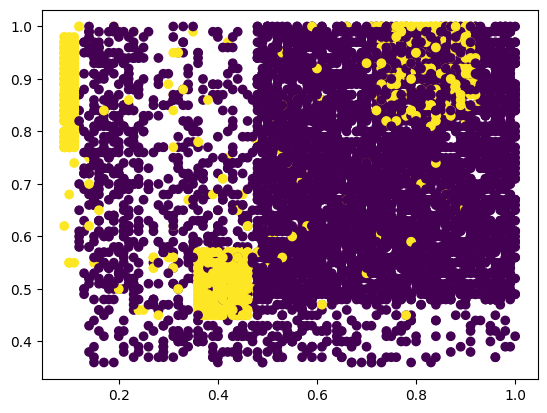

In [ ]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(x=X_train['satisfaction_level'], y=X_train['last_evaluation'], c=y_train)
plt.show()